In [10]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# a. Loading and Preprocessing img data
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test, y_test)=mnist.load_data()
input_shape=(28,28,1)

In [12]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)#we have reshape it to get channel 1D as grascale

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')#Converting x_train and x_test to float32 is done to ensure that the data type of the image arrays is compatible with deep learning frameworks, which commonly expect floating-point values for numerical stability and efficiency during computation.

In [14]:
x_train = x_train/255     #normalaize the data to 0 to 1 (becoz pixel value ranges betwwen 0 to 255...black 0
x_test = x_test/255
print("shape of training: ", x_train.shape)
print("shape of testing: ", x_test.shape)

shape of training:  (60000, 28, 28, 1)
shape of testing:  (10000, 28, 28, 1)


In [15]:
# b. Defining the model's architecture
model = Sequential()  #suentially
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))    #3parameter(convlayer,kernalzise,input data)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) #we want to convert  multidimenstional img into signle vector to pass hidden layer
model.add(Dense(200,activation= "relu")) #hidden layer 
model.add(Dropout(0.3))   #remove random neuron from hidden
model.add(Dense(10,activation= "softmax"))#output layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 200)               946600    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                      

In [16]:
# c. Training the model
model.compile(optimizer="adam",                                      
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2)            #model ko train karne ke liye compile aur fit method ka use karte hai
                                                        #parameter 3 2no mai


Epoch 1/2
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2111 - accuracy: 0.9358
Epoch 2/2
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0882 - accuracy: 0.9728


In [17]:
# d. Estimating the model performance
test_loss,test_acc=model.evaluate(x_test,y_test)    #model.evaluate
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0595 - accuracy: 0.9805
Loss=0.060
Accuracy=0.980


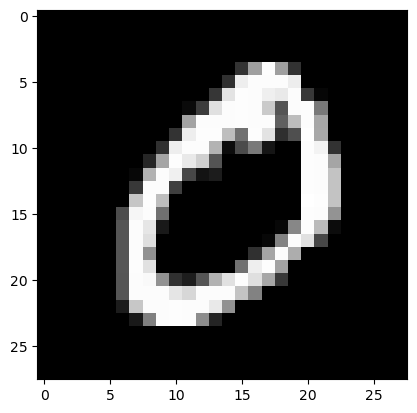

1/1 [==============================] - 0s 98ms/step
predicted class: 0


In [18]:
image = x_train[1]
plt.imshow(np.squeeze(image), cmap='gray')      #squeeze signgle dimentional entries remove kart# Using cmap='gray' helps show the pixel intensity in grayscale, with 0 as black and 1 (or 255 before normalization) as white.
plt.show()

image = image.reshape(1,image.shape[0], image.shape[1], image.shape[2])#4 parameter pass karne padte hai..batch size,height,width,channel
predict_model = model.predict([image])
print("predicted class: {}".format(np.argmax(predict_model)))   #max probability kontya clas chi#0-9 ch numbers ahe mg jyachi probability jast ahe tyacha class return hoil